In [1]:
import numpy as np
from scipy.io import loadmat
from scipy.optimize import minimize
import matplotlib.pyplot as plt
 
data = loadmat("ex5data1.mat")
X_train, y_train = data['X'], data['y']
X_val, y_val = data['Xval'], data['yval']
X_test, y_test = data['Xtest'], data['ytest']
X_train = np.insert(X_train, 0, 1, axis=1)
X_val = np.insert(X_val, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)

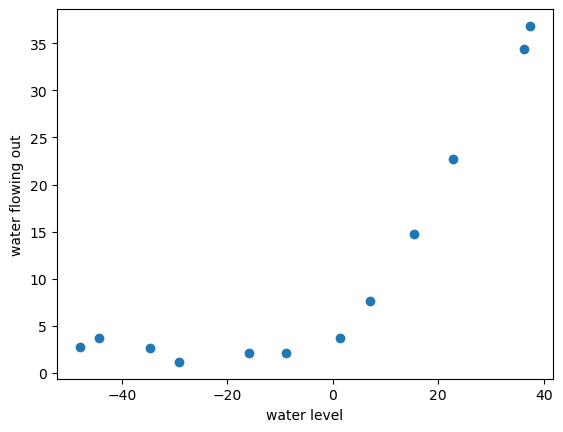

In [2]:
def plot_data():
    fig, ax = plt.subplots()
    ax.scatter(X_train[:, 1], y_train)
    ax.set(xlabel="water level",
           ylabel="water flowing out")
 
plot_data() 

In [3]:
def reg_cost(theta, X, y, lamda):
    cost = np.sum(np.power((X @ theta - y.flatten()), 2))
    reg = np.sum(np.power(theta[1:], 2)) * lamda
    return (cost + reg) / (2 * len(X))

In [4]:
def reg_gradient(theta, X, y, lamda):
    grad = (X @ theta - y.flatten()) @ X
    reg = lamda * theta
    reg[0] = 0
    return (grad + reg) / (len(X))

In [5]:
def train_model(X,y,lamda):
    theta = np.ones(X.shape[1])
    res = minimize(fun = reg_cost,
                   x0 = theta,
                   args = (X,y,lamda),
                   method = 'TNC',
                   jac = reg_gradient)
    return res.x

[13.08790348  0.36777923]


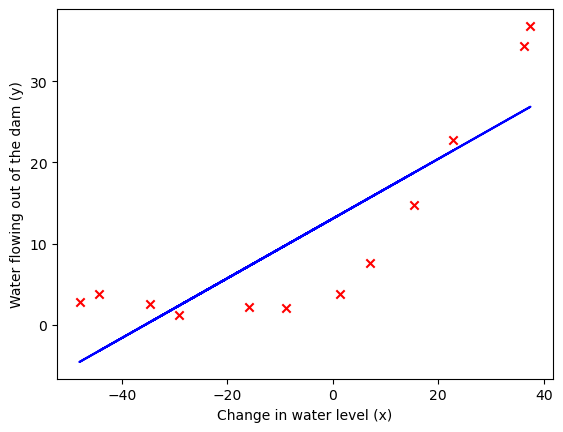

In [6]:
theta_final = train_model(X_train,y_train,lamda = 0)
print(theta_final)
 
fig,ax = plt.subplots()
plt.scatter(X_train[:, 1], y_train, c='r', marker='x')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')  
plt.plot(X_train[:,1],X_train@theta_final,c = 'b')
plt.show()


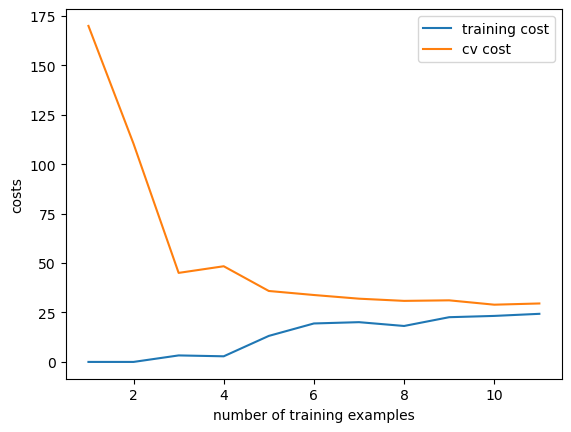

In [7]:
def plot_learning_curve(X_train,y_train,X_val,y_val,lamda):
    train_cost = []
    cv_cost = []
    x = range(1,len(X_train+1))
    
    for i in x:
        res = train_model(X_train[:i,:],y_train[:i,:],lamda)
        training_cost_i = reg_cost(res,X_train[:i,:],y_train[:i,:], lamda)
        cv_cost_i = reg_cost(res,X_val,y_val, lamda)
        train_cost.append(training_cost_i)
        cv_cost.append(cv_cost_i)
 
    plt.plot(x,train_cost,label = 'training cost')
    plt.plot(x,cv_cost,label = 'cv cost')
    plt.legend(loc = 1)
    plt.xlabel('number of training examples')
    plt.ylabel('costs')
    plt.show()
    
plot_learning_curve(X_train,y_train,X_val,y_val,lamda = 0)

In [8]:
def poly_feature(X, power):
    for i in range(2, power + 1):
        X = np.insert(X, X.shape[1], np.power(X[:, 1], i), axis=1)
    return X


In [9]:
def get_standard(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    return means, stds


In [10]:
def feature_normalize(X, means, stds):
    X[:, 1:] = (X[:, 1:] - means[1:]) / stds[1:]
    return X


In [11]:
power = 6

In [12]:
X_train_poly = poly_feature(X_train, power)
X_val_poly = poly_feature(X_val, power)
X_test_poly = poly_feature(X_test, power)

train_means, train_stds = get_standard(X_train_poly)

X_train_norm = feature_normalize(X_train_poly, train_means, train_stds)
X_val_norm = feature_normalize(X_val_poly, train_means, train_stds)
X_test_norm = feature_normalize(X_test_poly, train_means, train_stds)

In [13]:
theta_fit = train_model(X_train_norm, y_train, lamda=0)
print(theta_fit)


[ 11.21773525  10.89047071  12.86679848  10.258545    -4.22671468
 -11.38208818  -4.87307813]


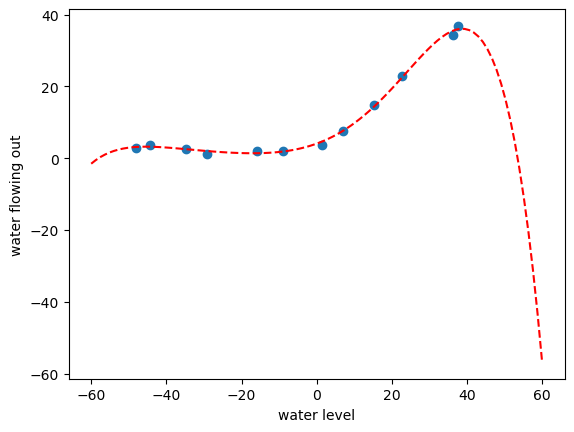

In [14]:
def plot_poly_fit():
    plot_data()
    x = np.linspace(-60, 60, 100)
    xReshape = x.reshape(100, 1)
    xReshape = np.insert(xReshape, 0, 1, axis=1)
    xReshape = poly_feature(xReshape, power)
    xReshape = feature_normalize(xReshape, train_means, train_stds)
 
    plt.plot(x, xReshape @ theta_fit, 'r--')
    plt.show()
 
plot_poly_fit()

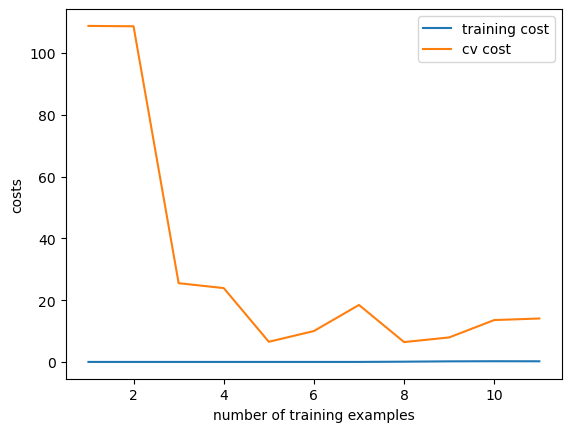

In [15]:

plot_learning_curve(X_train_norm, y_train, X_val_norm, y_val, lamda=0)

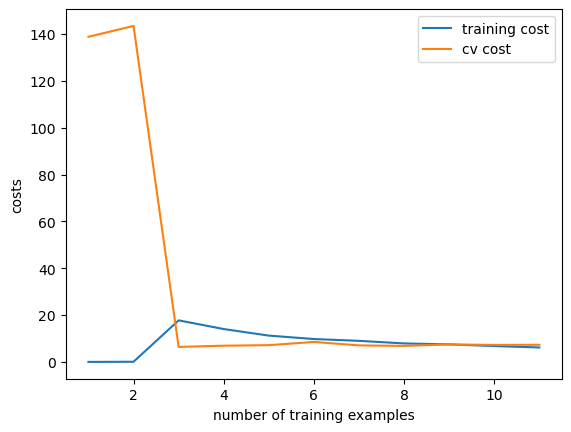

In [16]:
plot_learning_curve(X_train_norm, y_train, X_val_norm, y_val, lamda=1)

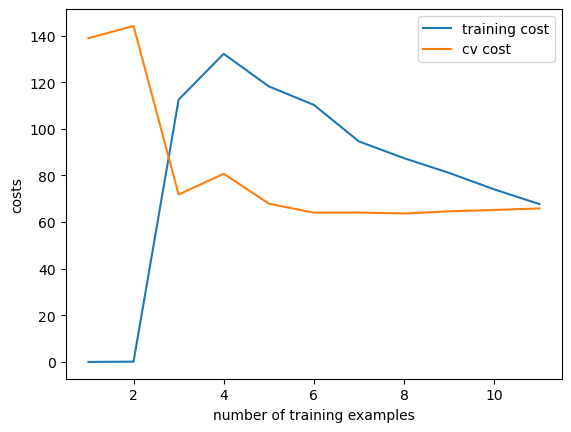

In [17]:
plot_learning_curve(X_train_norm, y_train, X_val_norm, y_val, lamda=100)

In [18]:
lamdas = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
training_cost = []
cv_cost = []
for lamda in lamdas:
    res = train_model(X_train_norm, y_train, lamda)
    tc = reg_cost(res, X_train_norm, y_train, lamda=0)
    cv = reg_cost(res, X_val_norm, y_val, lamda=0)
 
    training_cost.append(tc)
    cv_cost.append(cv)

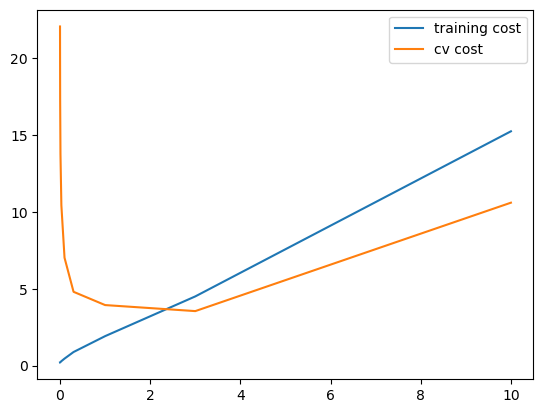

In [19]:
plt.plot(lamdas, training_cost, label='training cost')
plt.plot(lamdas, cv_cost, label='cv cost')
plt.legend()
plt.show()

In [20]:
bestLamda = lamdas[np.argmin(cv_cost)]
print(bestLamda)

res = train_model(X_train_norm, y_train, bestLamda)
print(reg_cost(res, X_test_norm, y_test, lamda=0))

3
4.3976161577441975
